## Q1: Import libraries and project data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/vanessanunezpenas/Documents/Data Analytics Program - CareerFoundry/II Data Immersion 1 - Preparing and Analyzing Data/A4 - Python Fundamentals/2024.01 Instacart Basket Analysis'
path

'/Users/vanessanunezpenas/Documents/Data Analytics Program - CareerFoundry/II Data Immersion 1 - Preparing and Analyzing Data/A4 - Python Fundamentals/2024.01 Instacart Basket Analysis'

In [3]:
orders_products_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
orders_products_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First Name,Surname,Gender,State,Age,date_joined,n_dependants,familial_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


## Histogram of the “order_hour_of_day” column

Text(0.5, 0, 'Hour of the Day')

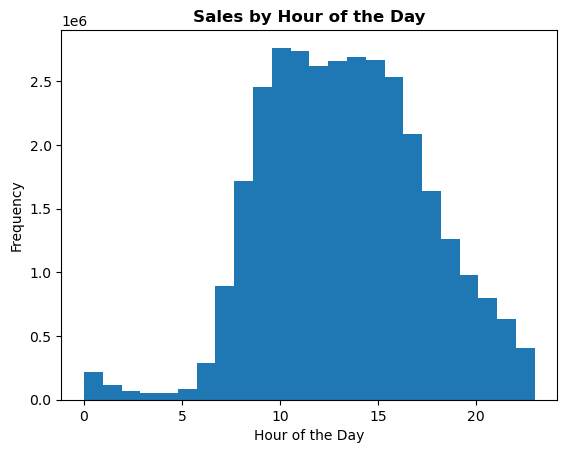

In [5]:
hist_hour_day = orders_products_all['order_hour_of_day'].plot.hist(bins = 24)
plt.title('Sales by Hour of the Day', fontweight = 'bold')
plt.xlabel('Hour of the Day')

We can see how the busiest hours of the day are between 10:00-15:00, and the quietest are between 0:00-6:00. 

## Distribution of orders among customers in terms of loyalty

(array([0, 1, 2]),
 [Text(0, 0, 'Regular customer'),
  Text(1, 0, 'Loyal customer'),
  Text(2, 0, 'New customer')])

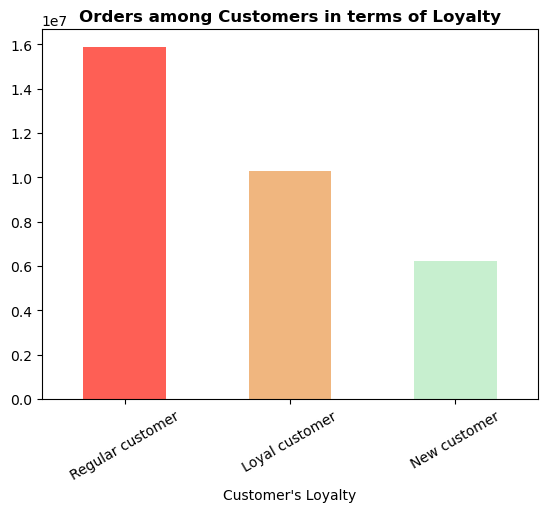

In [6]:
bars_loyalty = orders_products_all['loyalty_flag'].value_counts().plot.bar(color = ['#FE5F55', '#F0B67F', '#C7EFCF'])
plt.title('Orders among Customers in terms of Loyalty', fontweight = 'bold')
plt.xlabel("Customer's Loyalty")
plt.xticks(rotation = 30)

## Expenditure depending on the hour of the day

In [7]:
# Sampling the data

np.random.seed(4)

#Create a list holding True/False values to test np.random.rand() <= 0.7
dev = np.random.rand(len(orders_products_all)) <= 0.7

In [8]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [9]:
np.random.rand(10)

array([0.14652875, 0.19185561, 0.99657905, 0.59139971, 0.45592832,
       0.56184089, 0.40007843, 0.31079573, 0.35588093, 0.63298758])

In [10]:
# Store 70% of the sample in the dataframe big
big = orders_products_all[dev]

In [11]:
# Store 30% of the sample in the dataframe small
small = orders_products_all[~dev]

In [12]:
len(orders_products_all)

32406041

In [13]:
len(big) + len(small)

32406041

In [14]:
# Reducing the samples to only those columns necessary for the chart
df_2 = small[['order_hour_of_day','prices']]

Text(0.5, 0, 'Hour of the Day')

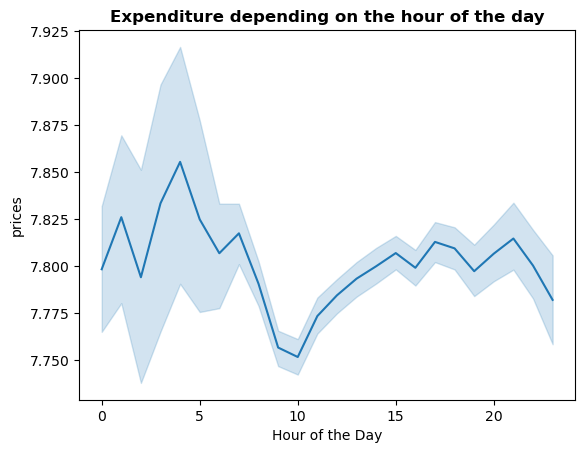

In [16]:
# Create the chart

line_expenditure = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')
plt.title('Expenditure depending on the hour of the day', fontweight = 'bold')
plt.xlabel('Hour of the Day')

## Connections between age and number of dependents

In [19]:
orders_products_all['Age'].describe()

count    3.240604e+07
mean     4.946525e+01
std      1.848557e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [20]:
orders_products_all['Age'].mean()

49.46524976623957

In [21]:
orders_products_all['Age'].min()

18

In [22]:
orders_products_all['Age'].max()

81

In [24]:
orders_products_all['n_dependants'].describe()

count    3.240604e+07
mean     1.501891e+00
std      1.118866e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: n_dependants, dtype: float64

Text(0, 0.5, 'Number of Dependants')

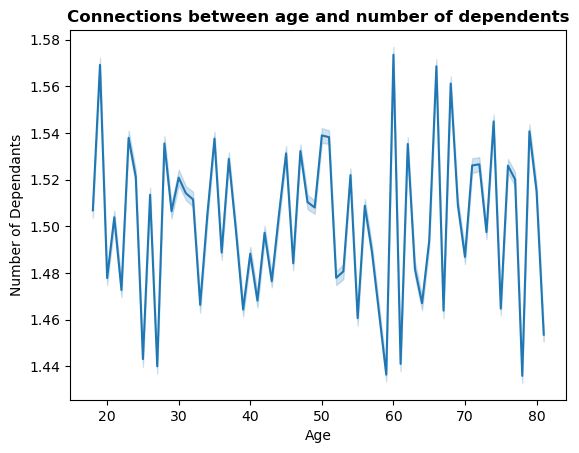

In [25]:
line_age_dependants = sns.lineplot(data = orders_products_all, x = 'Age',y = 'n_dependants')
plt.title('Connections between age and number of dependents', fontweight = 'bold')
plt.ylabel('Number of Dependants')

The line chart shows there is no connections between age and number of dependants. The average is 1.5 dependants.

## Connection between age and spending power

In [26]:
orders_products_all['income'].describe()

count    3.240604e+07
mean     9.943761e+04
std      4.305710e+04
min      2.590300e+04
25%      6.700200e+04
50%      9.661700e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

In [27]:
orders_products_all['income'].min()

25903

In [28]:
orders_products_all['income'].max()

593901

In [29]:
orders_products_all['income'].mean()

99437.61391525735

Text(0, 0.5, 'Income')

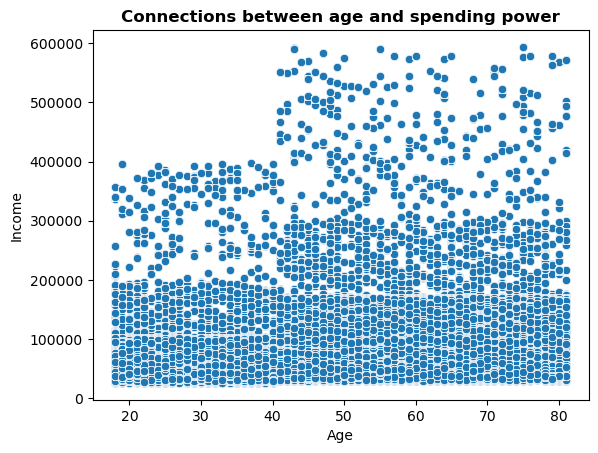

In [31]:
scatterplot_age_income = sns.scatterplot(x = 'Age', y = 'income',data = orders_products_all)
plt.title('Connections between age and spending power', fontweight = 'bold')
plt.ylabel('Income')

Independently of the age, most of the customers have an income under 200,000. In the range 18-40 there are some customers with incomes between 200,000-400,000, and we find only higher incomes (400,000-600,000) above the 40s.

## Q8: Export the visualizations as .png

In [32]:
hist_hour_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hour_day.png'))

In [33]:
bars_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bars_loyalty.png'))

In [34]:
line_expenditure.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_expenditure.png'))

In [35]:
line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

In [36]:
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))